In [32]:

# Import necessary libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression



In [3]:
# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")
df.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [4]:
df.describe()


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.isnull().sum

<bound method DataFrame.sum of      gender  race/ethnicity  parental level of education  lunch  \
0     False           False                        False  False   
1     False           False                        False  False   
2     False           False                        False  False   
3     False           False                        False  False   
4     False           False                        False  False   
..      ...             ...                          ...    ...   
995   False           False                        False  False   
996   False           False                        False  False   
997   False           False                        False  False   
998   False           False                        False  False   
999   False           False                        False  False   

     test preparation course  math score  reading score  writing score  
0                      False       False          False          False  
1                 

In [8]:
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [25]:
# Data Preprocessing

df['pass'] = df['math score'].apply(lambda x: 1 if x >= 40 else 0) 
# Encode categorical columns (eg.gender)
df['gender'] = df['gender'].map({'male': 0,'female': 1}) 

# Encode 'parental level of education'
df['parental level of education'] = LabelEncoder().fit_transform(df['parental level of education'])

# Select features and target 
X = df[['reading score','gender','parental level of education']]
y = df['pass']


In [26]:
# Split Data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:

# Train Model 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.98      0.97      0.98       189

    accuracy                           0.96       200
   macro avg       0.80      0.85      0.82       200
weighted avg       0.96      0.96      0.96       200



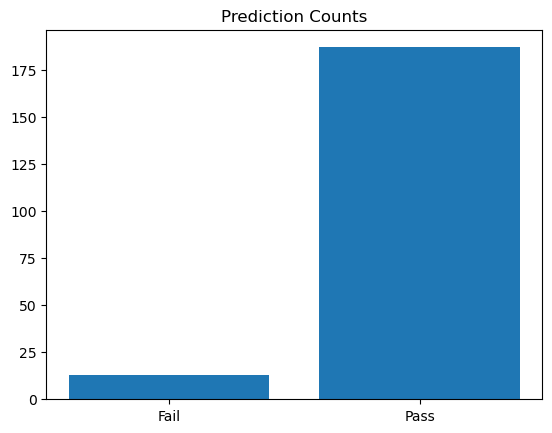

In [33]:
# Visualize the Result
plt.bar(['Fail', 'Pass'], [sum(y_pred==0), sum(y_pred==1)])
plt.title('Prediction Counts')
plt.show()

In [34]:
print("Missing values in each column:")

Missing values in each column:
